## **Python Data Analysis Project - Blinkit Analysis (Retail Data Exploration & KPI Tracking )**

## **Import Libraries**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Dataset**

In [6]:
df = pd.read_csv("blinkit_data.csv")

## **Sample Data**

In [8]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## **Size Of Dataset**

In [10]:
df.shape

(8523, 12)

## **Information about Dataset**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Statistics About Dataset**

In [14]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


## **Check For Null Values**

In [16]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

## **Check For Duplicate Data**

In [18]:
df.duplicated().sum()

0

## **Perform Data Cleaning**

In [20]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [21]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'reg' : 'Regular',
    'LF' : 'Low Fat',
    'low fat' : 'Low Fat'
})

In [22]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

## **Business Requiremnets**

## **Key Performance Indicator's (KPI's) Requiremnets**

## Total Sales

In [26]:
df['Sales'].sum()

1201681.4808

## Average Sales


In [28]:
df['Sales'].mean()

140.9927819781767

## Number Of Items Sold

In [30]:
df['Sales'].count()

8523

## Average rating

In [32]:
df['Rating'].mean()

3.965857092573038

## Total Outlets

In [100]:
df['Outlet Identifier'].nunique()

10

## **Charts Requirements**

## Total Sales by Fat Content

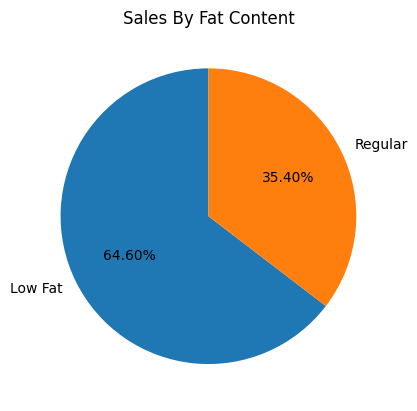

In [35]:
sales_by_fat_content = df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat_content, labels = sales_by_fat_content.index, autopct = '%1.2f%%', startangle = 90)
plt.title('Sales By Fat Content')
plt.show()


Insight:
    The analysis reveals that low fat items account for approximately 64.6% of total sales, while regular fat items contribute around 35.4%.

Interpretation: 
    This indicates a clear customer preference for low fat products, suggesting growing health-conscious behavior among consumers. This insight can help      category managers and product teams prioritize stocking and promoting low fat items, and consider expanding the low-fat product range to meet demand      and boost revenue.

Business Impact: 

    1) Optimize inventory by focusing more on low fat items.

    2) Develop marketing campaigns highlighting healthy/lighter options.

## Total sale by Item type

In [38]:
sales_by_item_type = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).reset_index()

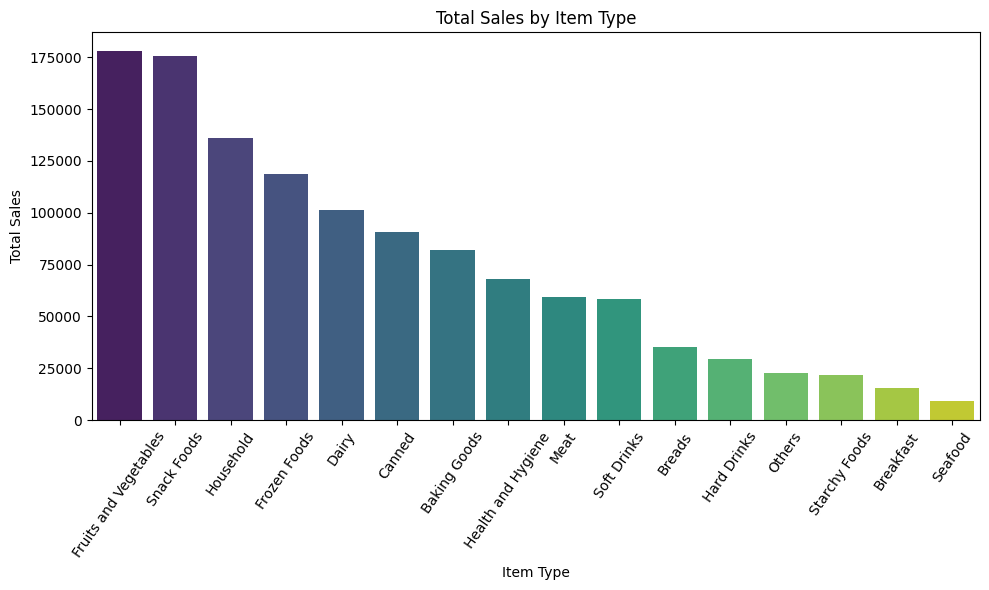

In [39]:
# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Sales', data=sales_by_item_type, palette='viridis')
#ax.bar_label(ax.containers[0])
plt.xticks(rotation=55)
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

Insight:
    The top three contributors to total sales are:

    1) Fruits and Vegetables (178K+)
    2) Snack Foods (175K+)
    3) Household Items (136K+)

    These categories significantly outperform others, while Seafood and Breakfast items account for the lowest sales, contributing less than 10K and 16K respectively.

Interpretation:
    The data shows that fresh produce and convenience snacks dominate consumer purchases, indicating a strong demand for daily essentials and ready-to-eat items. On the other hand, niche categories like seafood and breakfast products have limited traction.

Business Impact:

    1) Focus marketing and inventory efforts on high-performing categories like Fruits & Vegetables and Snacks.
    2) Evaluate low-performing categories (e.g., Seafood, Breakfast) for improvement opportunities or potential de-prioritization.
    3) Consider cross-promotional strategies linking top sellers with underperforming items to boost their visibility and sales.

## Fat Content by Outlet for Total Sales

In [42]:
group = df.groupby(['Item Fat Content', 'Outlet Location Type'])['Sales'].sum().reset_index()

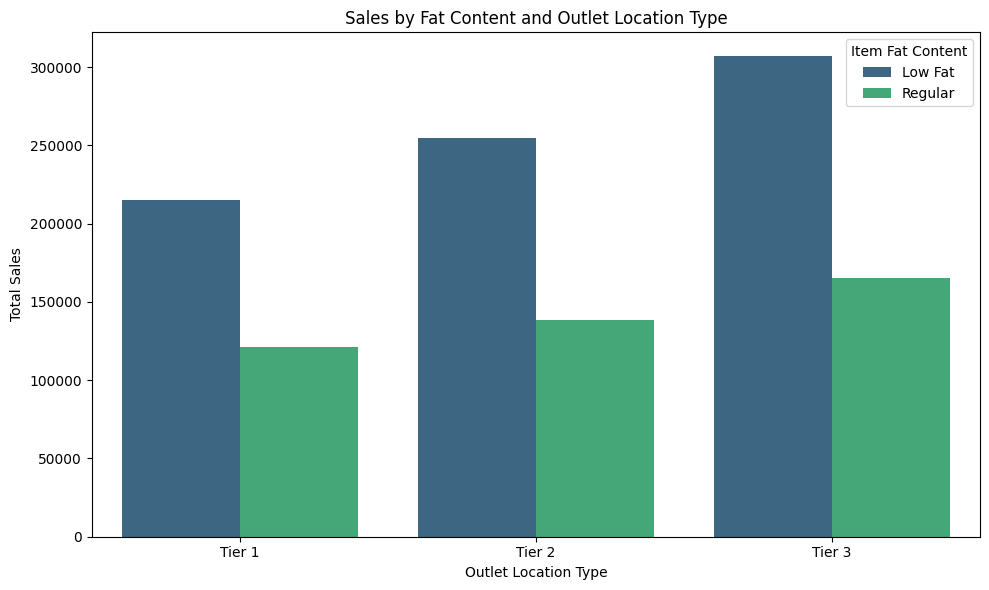

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(data=group, x='Outlet Location Type', y='Sales', hue='Item Fat Content', palette='viridis')

plt.title('Sales by Fat Content and Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

Insight:
    Across all outlet location types:

    1) Low Fat items consistently outperform Regular fat items in terms of sales.
    2) Tier 3 outlets contribute the highest sales for both Low Fat (306.8K) and Regular (165.3K) categories.
    3) Tier 1 outlets show the lowest sales across both fat content types.

Interpretation:
    Customers in Tier 3 and Tier 2 areas show a stronger demand for both Low Fat and Regular items, suggesting these locations have higher foot traffic or broader product availability.
    The consistent preference for Low Fat products across all tiers indicates a shift towards health-conscious purchasing behavior.

Business Impact:

    1) Consider stocking more Low Fat products across all outlet tiers to align with customer preference.
    2) Increase inventory and promotional efforts in Tier 3 and Tier 2 locations where sales are highest.
    3) Explore health-focused product bundling or campaigns to further drive Low Fat category growth.

## Total Sales by Outlet Establishment

In [46]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
sales_by_year

Outlet Establishment Year
1998    204522.2570
2000    131809.0156
2010    132113.3698
2011     78131.5646
2012    130476.8598
2015    130942.7782
2017    133103.9070
2020    129103.9564
2022    131477.7724
Name: Sales, dtype: float64

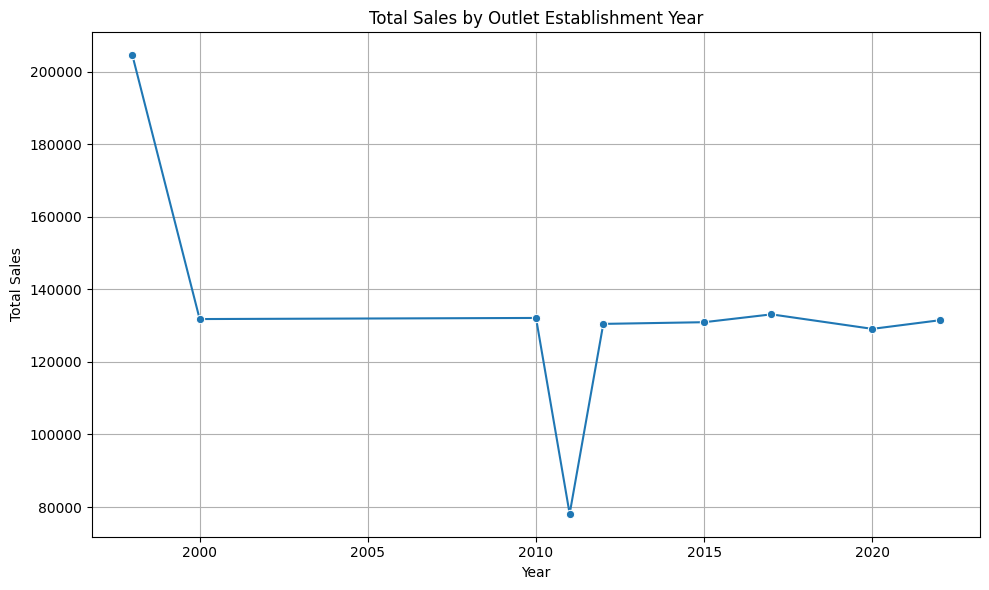

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, marker='o')

plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Insight:

    1) The highest total sales are recorded for outlets established in 1998 (204.5K), significantly ahead of other years.
    2) Sales from 2000 to 2022 remain relatively consistent, ranging around 129K to 133K.
    3) The lowest sales are seen in 2011 (78K), which may indicate underperformance or lower outlet count for that year.

Interpretation:

    1) Older outlets (1998) may benefit from strong brand presence, loyal customer bases, or established operational practices.
    2) The flat trend across recent years suggests that newer outlets have not drastically outperformed older ones, possibly due to similar market        conditions or consistent strategy across launches.

Business Impact:

    1) Reinforce and leverage strategies used in 1998 outlets—they could offer best practices for growth.
    2) Monitor newer outlets (2020, 2022) for long-term growth trends to optimize future expansion plans.



## Why 1998 has greater sale compare to other years??

In [108]:
outlet_count = df.groupby('Outlet Establishment Year')['Outlet Identifier'].nunique()

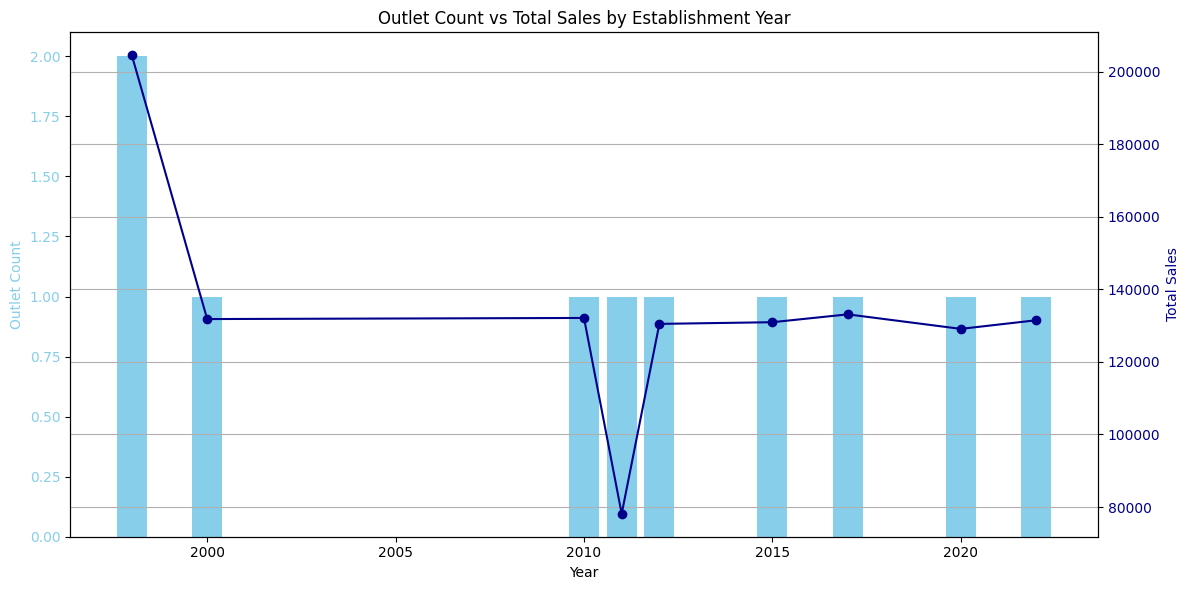

In [110]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar for Outlet Count
color = 'skyblue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Outlet Count', color=color)
ax1.bar(outlet_count.index, outlet_count.values, color=color, label='Outlet Count')
ax1.tick_params(axis='y', labelcolor=color)

# Line for Sales
ax2 = ax1.twinx()
color = 'darkblue'
ax2.set_ylabel('Total Sales', color=color)
ax2.plot(sales_by_year.index, sales_by_year.values, color=color, marker='o', label='Total Sales')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Outlet Count vs Total Sales by Establishment Year')
fig.tight_layout()
plt.grid(True, axis='y')
plt.show()


## Sales by Outlet Size

In [54]:
sales_by_outlet_size = df.groupby('Outlet Size')['Sales'].sum().reset_index()
sales_by_outlet_size

,Outlet Size,Sales
0,High,248991.5840
1,Medium,507895.7284
2,Small,444794.1684


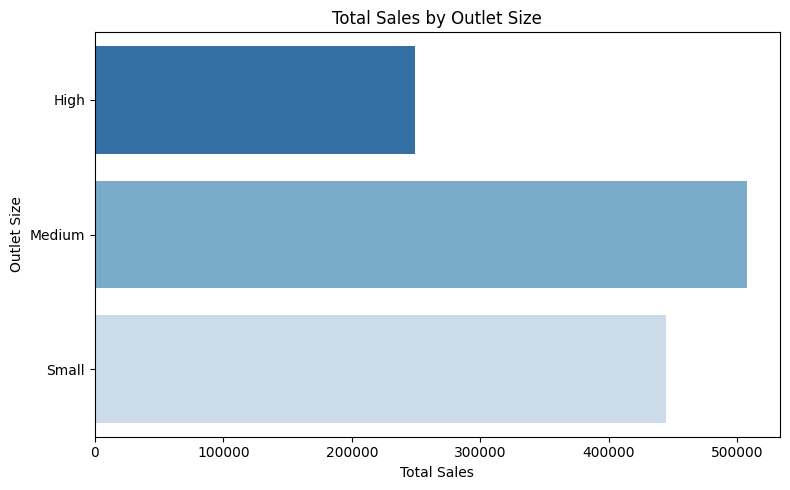

In [55]:

plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_outlet_size, x='Sales', y='Outlet Size', palette='Blues_r')

plt.title('Total Sales by Outlet Size')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Size')
plt.tight_layout()
plt.show()


Insight:

    1) Medium-sized outlets generated the highest total sales (507.9K), followed by small outlets (444.8K), and then high-sized outlets (248.9K).
    2) Despite their limited space, small outlets outperform large ones, suggesting better efficiency or strategic location.
    3) High-sized outlets underperform, indicating underutilization of space or misaligned inventory strategies.

Interpretation:

    1) Medium outlets appear to offer the optimal balance between capacity and customer demand.
    2) Small outlets might be more strategically placed (e.g., high footfall areas), contributing to strong performance despite space limitations.
    3) High-sized outlets may need re-evaluation of their layout, product mix, or marketing approach to improve performance.

Business Impact:

    1) Prioritize scaling medium outlets, as they show the best ROI in terms of sales performance.
    2) Optimize operations in large outlets to boost productivity and justify their size.
    3) Consider expanding small-format stores in urban zones where space is limited but demand is high.

## Sales by Outlet Location

In [58]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False).reset_index()


In [59]:
sales_by_location

,Outlet Location Type,Sales
0,Tier 3,472133.0272
1,Tier 2,393150.6416
2,Tier 1,336397.8120


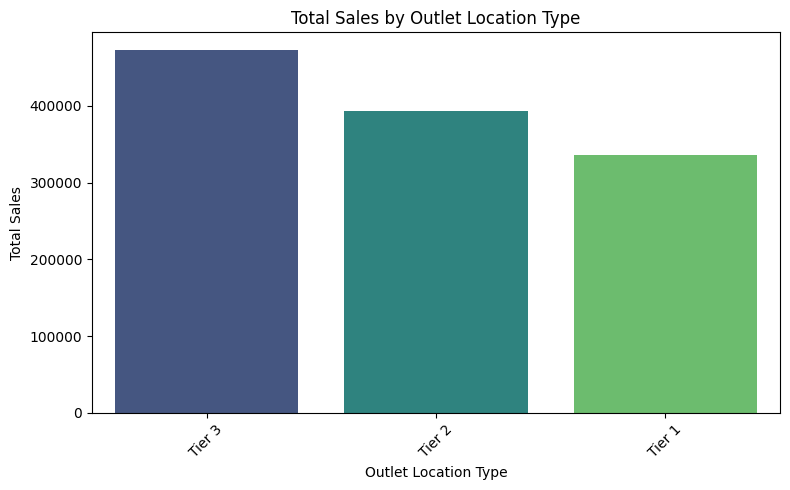

In [60]:
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_location, x='Outlet Location Type', y='Sales', palette='viridis')

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:

    1)Tier 3 cities lead in total sales with 472.1K, followed by Tier 2 (393.1K) and Tier 1 (336.3K).
    2)This trend shows that non-metro areas (Tier 2 & 3) have a stronger customer base or higher demand, possibly due to fewer competitors or broader store reach.

Interpretation:

    1) Tier 3 dominance may reflect expansion success in underserved markets, emphasizing the value of presence in smaller cities.
    2) Tier 1 areas, despite urban density, contribute the least to total sales, possibly due to higher competition, smaller outlets, or different customer preferences.

Business Impact:

    1) Focus marketing, logistics, and inventory optimization efforts in Tier 3 & Tier 2 regions.
    2) Re-evaluate strategy in Tier 1 areas — possibly reposition offerings or explore omnichannel improvements.

## Average sales Per Outlet

In [157]:
avg_sales_by_outlet = df.groupby('Outlet Identifier')['Sales'].mean().sort_values(ascending = False).reset_index()

<Axes: xlabel='Outlet Identifier', ylabel='Sales'>

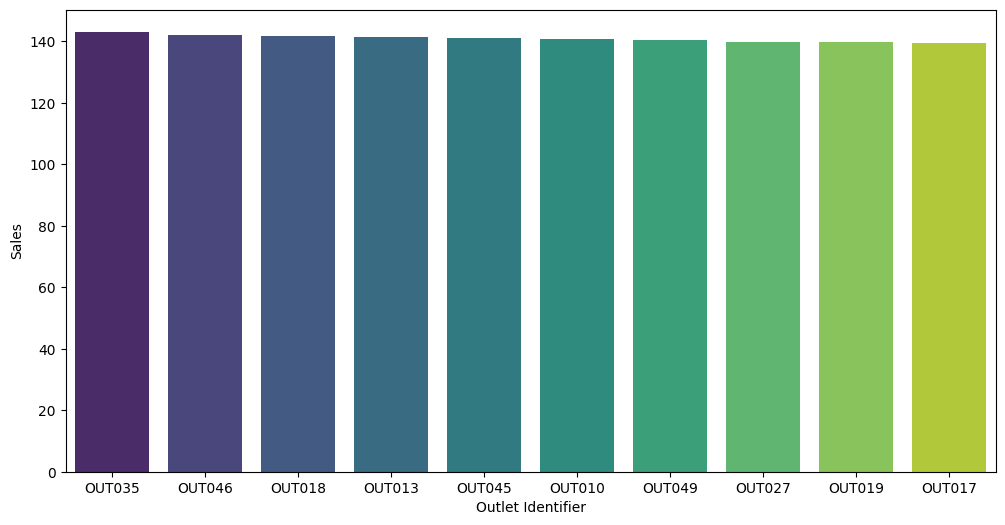

In [152]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Outlet Identifier', y = 'Sales', data = avg_sales_by_outlet, palette = 'viridis')

## Sales VS Rating

In [189]:
svr = df.groupby('Rating')['Sales'].sum().sort_values(ascending = False).reset_index()
svr

,Rating,Sales
0,4.0,475733.6056
1,4.3,95714.5790
2,4.2,93304.8346
3,4.1,71333.3722
4,5.0,59282.5424
5,4.4,49537.8988
6,3.9,42981.2372
7,4.5,37460.5842
8,3.8,35110.2596
9,3.7,30335.7108
